# Libs

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import export_graphviz
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from datetime import datetime
import pandas as pd
import numpy as np

import seaborn as sns
import graphviz

# Dados

**Descrição:**

Tabela que representa um site de vendas de carros, onde temos as características do carro e o indicador se o carro foi vendido ou não.

Temos as seguintes colunas:
- `Unnamed: 0` - Id da informação
- `mileage_per_year` - Milhas por ano
- `model_year` - Ano do modelo
- `price` - Preço do carro
- `sold` - Indica se foi vendido

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
a_renomear = { 
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
# substitui o sim e não por números inteiros onde 0 representa não e 1 representa sim
a_trocar = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [5]:
# cria uma nova coluna com a informação da idade do carro a partir da coluna ano do modelo
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [6]:
#transformar milhas por ano em km por ano
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [7]:
#selecionando apenas as colunas que irei utilizar
dados = dados[dados.columns[3:]]
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


# Análise

Visualização geral da distribuição dos dados

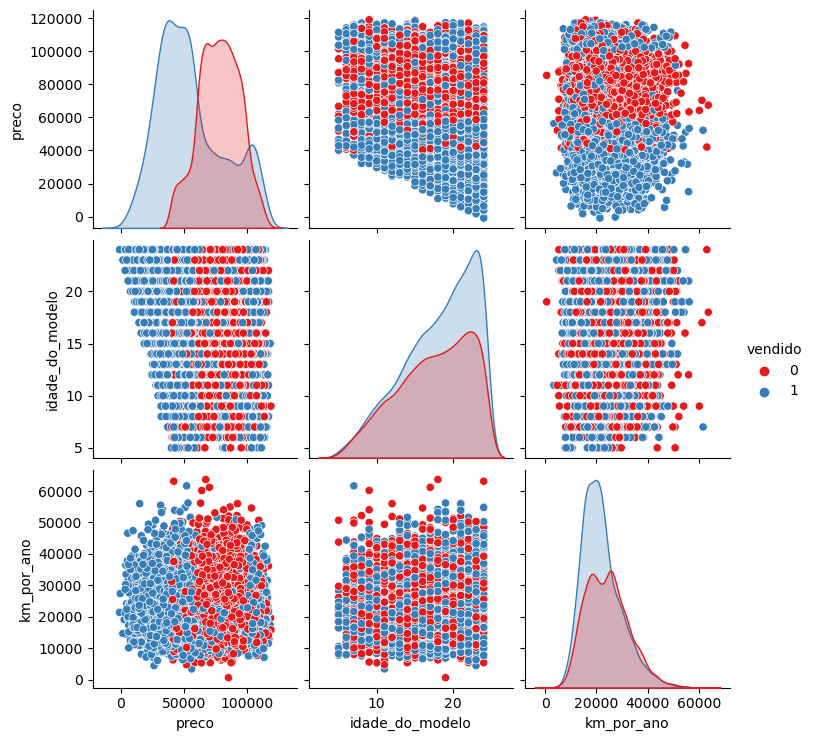

In [8]:
sns.pairplot(dados, hue="vendido", palette="Set1");

# Predição

In [9]:
x = dados[['preco','idade_do_modelo','km_por_ano']]
y = dados['vendido']

## Classificador LinearSVC

In [10]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                        stratify=y)

print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos')

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print(f'A acurácia foi de {round(acuracia,2)}')

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 46.88


/home/fernanda/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Classificador Dummy

**dummy stratified**

In [11]:
dummy_stratified = DummyClassifier(strategy = 'stratified')
dummy_stratified.fit(treino_x, treino_y)
previsoes_dummy = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes_dummy)*100
print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 52.44%


**dummy most frequent**

In [12]:
dummy_most_frequent = DummyClassifier(strategy = 'most_frequent')
dummy_most_frequent.fit(treino_x, treino_y)
previsoes_dummy_most_frequent = dummy_most_frequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes_dummy_most_frequent)*100
print("A acurácia do dummy most frequent foi %.2f%%" % acuracia)

A acurácia do dummy most frequent foi 58.00%


## Classificador SVC

In [13]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state=SEED, test_size=0.25,
                                                        stratify=y)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos')

# redimensiona os valores dos eixos x e y para uma escala próximas de valores entre eles
scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(random_state=SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print(f'A acurácia foi de {round(acuracia,2)}')

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 77.48


Nesse cenário com mais de 2 variáveis neste classificador não conseguimos ter uma boa compreenção das escolhas do modelo, com isso fica difícil estimar se esse é um bom modelo ou não

## Árvore de decisão

In [14]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,  test_size=0.25,
                                                        stratify=y)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos')

modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print(f'A acurácia foi de {round(acuracia,2)}')

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 79.28


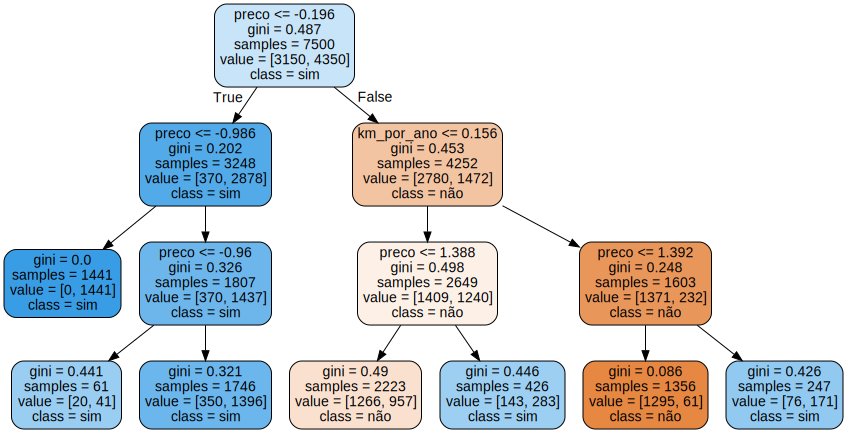

In [15]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True,rounded = True,
                           feature_names = features,
                           class_names = ['não','sim'])#0->1
grafico = graphviz.Source(dot_data)
grafico

Com essa visualização conseguimos ter uma visão mais clara sobre as decisões tomadas pelo modelo